## INST 447 Assignment 1
### Taner Bulbul, Spring 2023
### Research Question: 
Do people order different foods at different times of day? For example, do people order more junk food relative to other foods late at night?

### Technical Skills: 
Explore the data using Pandas. Visualize the data to help address main research question. Tell a compelling story by presenting results in Jupyter notebook.
### Source of data and description of data
Original data is from Instacart which was made available on their website (https://www.instacart.com/datasets/grocery-shopping-2017 (Links to an external site.)).The data is summarized by Professor Donal Heidenblad into a csv file named InstacartOrdersByDepartment.csv

Data Codebook:   
Each row is a summary of orders associated with a particular hour in the day and a particular department.  
order_hour_of_day: The hour of the day when the order was placed (0 = 12am, 1 = 1am etc.)   
department: The department the products came from (e.g. alcohol, produce).   
num_orders_hour: The number of products ordered from this particular department during this particular hour.   
Tot_orders_dept: The total number of products ordered from this particular department across all hours of the day.  


### Analysis
I used three visualizations for answering the research question. A Column chart with widgets, a stacked column chart and a line chart. For each visualization I transformed the data columns and rows approriate for the charts using pivot functions. Main goal is to analyze the Instacart orders by department by time of the day (hourly) and identify the types of orders and how they are changing throughout a day.

Main visualization I used is a column chart with three dimensions (Time, department and number of orders). This visualization utilize the widgets and provides a time line to select a particular time. It also provides two dropdown menus where one or two food types can be chosen and compared at any time of the day. If "None" is selected in both dropdown menus, then all food categories are displayed. This visualization provides the order type at any time of the day and provides an easy understanding of the orders for each department. Slider can be controlled by a mouse or right and left arrow keys.

Stacked column chart provides a bigger picture of the orders for a whole day and each type of order is shown by the hour. This chart is not necessarily to see exact order quantities but an easy way of analyzing the whole picture of orders throughout the day (Gestalt emergence principle).

Line chart also provides a daily picture of the orders throughtout the day. One difference is that line chart shows the order quantities per hour per department and stacked column chart shows an overall order count per day for all departments in addition to the individual order counts.

### Results
People order different quantities of foods at different time of the day. The most ordered five categories are produce, dairy eggs, beverages, snacks and frozen food in order throughout the day. Orders are the least between midnight and 6 a.m. and the most orders are between 10 a.m. an 5 p.m.  
Beverages and dairy eggs orders increase starting 7a.m. and stay high most of the day. Produce orders overall is the highest and peaks at 2 p.m. to 35,000 orders. Alcohol orders peaks at 3 p.m. and stay high until 6 p.m.
### Take away 
Number of instacart food orders change throughout the day and people order some foods more than the others depending on the time.Overall, each food category seems to follow a common pattern though. Orders are lower 12 a.m. to 6 a.m, then they start increasing gradually until 10 a.m. and they are the highest from 10 a.m. to 5 p.m. and then they gradually decrease from 5 p.m. to midnight.

The analysis is important for planning the stocking quantities of the food at the stores based on the expected orders and also planning enough delivery logistics. The analysis is useful for undersanding the capacity of the web servers and customer support during high order times.

### Limitations of the data
Food categories are not detailed per item. For example frozen pizza orders may be higher than other frozen foods but we don't have the individual food item numbers. Coffee orders may peak in the morning but we don't have detailed beverage items. We can't also make relations between food orders with the given data. For example someone ordering meat may also order certain vegetables with it.

### Challenge Questions
Raw product counts are more important than proportions for example the logistics of stocking the items in stores.  
Grouping the orders to 4 periods could be easier for analysis or planning. Overnight, morning, day and night for example.
It is important for Instacart becasue of their planning of logistics and order handling depends on this data analysis. It is important to consumer as they can adjust their order patterns to avoid busy times.  
Which items are ordered together may be important so that Instacart could for example use that information to suggest more products to the consumer. Tracking the order source is also important to track the order patterns of customers and suggest more items (I am assuming that is what Instacart also does)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, widgets

In [2]:
order_df = pd.read_csv("InstacartOrdersByDepartment.csv")

In [3]:
order_df.head()

,order_hour_of_day,department,num_orders_hour,tot_orders_dept
0,0,alcohol,33,5598
1,1,alcohol,32,5598
2,2,alcohol,5,5598
3,3,alcohol,3,5598
4,4,alcohol,2,5598


In [4]:
order_clean_df = order_df.drop(columns=['tot_orders_dept']) # not using this column

In [5]:
#transform data for visualizations below, leave order_df unchanged
pivot_df = order_clean_df.pivot(index='department',columns='order_hour_of_day')
pivot_df.head()

num_orders_hour                                             \
order_hour_of_day              0    1    2    3    4    5     6     7     8    
department                                                                     
alcohol                        33   32    5    3    2   12    34    92   161   
babies                         70   70   49   25   22   38   202   530   948   
bakery                        307  175  103   75   86  127   428  1285  2489   
beverages                     694  473  285  247  231  398  1031  2815  5400   
breakfast                     175  124   60   54   62   88   264   860  1488   

                         ...                                                  \
order_hour_of_day    9   ...    14    15    16    17    18    19    20    21   
department               ...                                                   
alcohol             343  ...   518   620   528   443   352   220   149    85   
babies             1257  ...  1191  1184  1145   858   710   594   642   489   
bakery             3356  ...  4260  4056  3859  3433  2748  2023  1454  1111   
beverages          8185  ...  9710  9415  8675  8075  6439  4881  3272  2551   
breakfast          2142  ...  2533  2372  2265  2087  1603  1316   891   742   

                               
order_hour_of_day    22    23  
department                     
alcohol              46    41  
babies              395   195  
bakery              904   500  
beverages          1991  1288  
breakfast           605   344  

[5 rows x 24 columns]

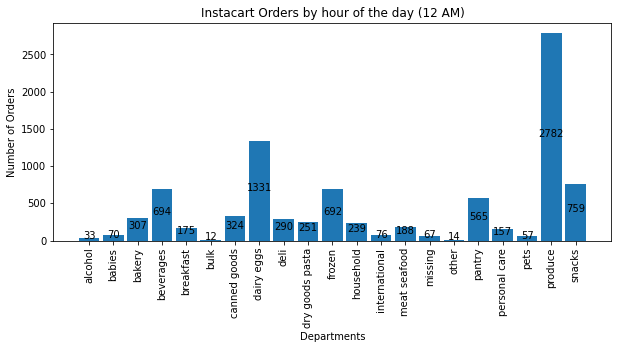

interactive(children=(IntSlider(value=0, description='Hour', max=23), Dropdown(description='Dept_1', options=(…

<function __main__.plotbyHour(Hour, Dept_1, Dept_2)>

In [9]:
#Format hour of day to use in the title of the graph
hour_list=['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM',
          '6 AM','7 AM','8 AM','9 AM','10 AM','11 AM','12 PM',
          '1 PM','2 PM','3 PM','4 PM','5 PM',
          '6 PM','7 PM','8 PM','9 PM','10 PM','11 PM']
#put the text in the center of bars (addlabels are from geeksforgeeks.org and modified)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

def plotbyHour(Hour,Dept_1,Dept_2):
    """Plot the data in a interactive column chart.
    Arguments:
       Hour(int): 0 to 23 representing hour of day
       Dept_1(str): Department 1 name to cselect
       Dept_2(str): Department 2 name to select
    Returns: None
    """
    plt.figure(figsize=(10,4))
    width = 0.85
    #filter departments based on user selection
    if Dept_1 != 'None' or Dept_2 != 'None':
        if Dept_1 == Dept_2:
            temp_df = pivot_df.filter(items=[Dept_1], axis=0)
        else:
            temp_df = pivot_df.filter(items=[Dept_1,Dept_2], axis=0)
        width = 0.2
    else:
        temp_df = pivot_df
    # draw the bar chart  
    plt.bar(temp_df.index, temp_df[('num_orders_hour',  Hour)], width=width)
    addlabels(temp_df.index, temp_df[('num_orders_hour',  Hour)])
    plt.xticks(rotation='vertical')
    plt.title("Instacart Orders by hour of the day" +" ("+ hour_list[Hour]+")")
    plt.ylabel("Number of Orders")
    plt.xlabel("Departments")
    plt.show()

#I used the call below only to generate the graph in HTML, HTML otherwise not
# showing the graph with widgets. Widget call is below to see it in action
plotbyHour(0,'None','None') 

# Create a selection list for the departments
item_list = list(pivot_df.index)
item_list.insert(0,'None') # add None to the top of the list
#Create user interactive widgets
interact(plotbyHour,Dept_1=item_list,Dept_2=item_list,Hour=widgets.IntSlider(min=0,max=23,step=1,value=0))


In [10]:
#Transform data for a stacked column, leave order_df unchanged
stacked_df = order_clean_df.pivot(index='order_hour_of_day',columns='department')
stacked_df.head()

num_orders_hour                                         \
department                alcohol babies bakery beverages breakfast bulk   
order_hour_of_day                                                          
0                              33     70    307       694       175   12   
1                              32     70    175       473       124   13   
2                               5     49    103       285        60    3   
3                               3     25     75       247        54    1   
4                               2     22     86       231        62    0   

                                                                ...            \
department        canned goods dairy eggs deli dry goods pasta  ... household   
order_hour_of_day                                               ...             
0                          324       1331  290             251  ...       239   
1                          150        827  197             157  ...       134   
2                           99        456  104              87  ...        91   
3                          100        391   80              60  ...        59   
4                           96        383   62              74  ...       113   

                                                                   \
department        international meat seafood missing other pantry   
order_hour_of_day                                                   
0                            76          188      67    14    565   
1                            50          120      40    10    350   
2                            25           77      13     6    201   
3                            32           40      15     2    136   
4                            27           50      13     3    140   

                                                     
department        personal care pets produce snacks  
order_hour_of_day                                    
0                           157   57    2782    759  
1                           101   18    1697    455  
2                            60    8     985    244  
3                            37    6     682    203  
4                            38   20     622    194  

[5 rows x 21 columns]

In [11]:
stacked_df.reset_index(inplace=True)#move order_hour to column

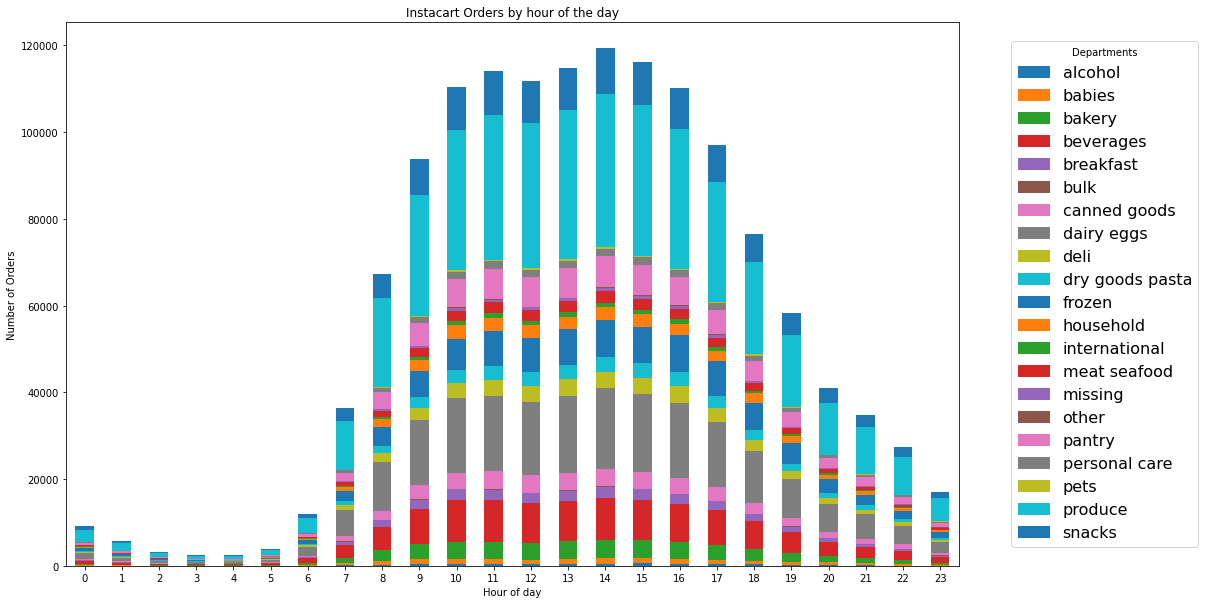

In [12]:
stacked_df.plot(x = 'order_hour_of_day', kind='bar', stacked=True,
        title='Instacart Orders by hour of the day',figsize=(16,10))
plt.legend(list(stacked_df.columns.levels[1]),
           bbox_to_anchor = (1.05,0.5), loc='center left',
           title='Departments', prop = {'size' : 16})
plt.ylabel("Number of Orders")
plt.xlabel("Hour of day")
plt.xticks(rotation='horizontal')
plt.show()

Let's draw a line chart as well to see the orders per department over a day  
for each department.

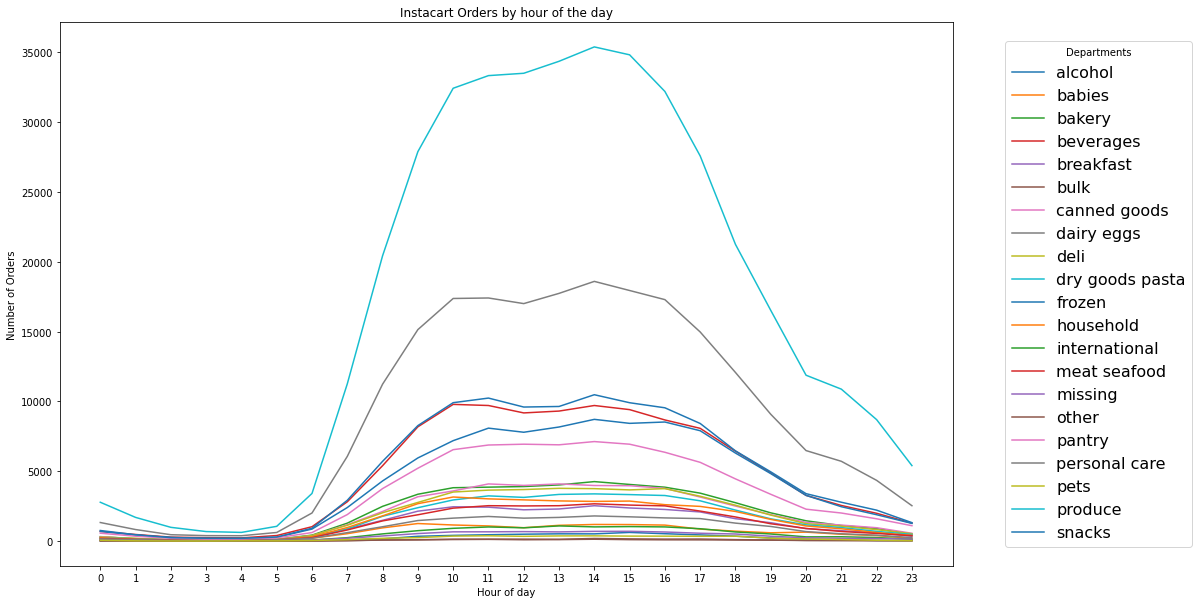

In [13]:
stacked_df.plot(x = 'order_hour_of_day', y= 'num_orders_hour',figsize=(16,10))
plt.legend(list(stacked_df.columns.levels[1]),
           bbox_to_anchor = (1.05,0.5), loc='center left',
           title='Departments', prop = {'size' : 16})
plt.ylabel("Number of Orders")
plt.xlabel("Hour of day")
plt.xticks(list(stacked_df.order_hour_of_day),rotation='horizontal')
plt.title('Instacart Orders by hour of the day')
plt.show()